<a href="https://colab.research.google.com/github/IVMRanepa/courses.shift01/blob/main/Network_Security_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практикум: Основы защиты сети**

**Формат:** Python 3, интерактивные задания, комментарии, примеры визуализации.

**Цель:** сформировать базовые навыки по защите сетей: от понимания архитектуры и угроз до построения простых средств мониторинга и аудита.
________________________________________
1. **Обзор защиты сети**

**Задание**: создать Python-скрипт, который выводит основные элементы сетевой безопасности (Firewall, [IDS/IPS](https://rt-solar.ru/products/solar_ngfw/blog/3953/), VPN, NAC, SIEM) в виде диаграммы (matplotlib + networkx).

**Комментарий:** используем networkx для построения графа, связываем узлы «угрозы» → «средства защиты».
**Пример**: GitHub: networkx security diagram
________________________________________


**Цель:** визуализировать базовую архитектуру сети и её защитные элементы.

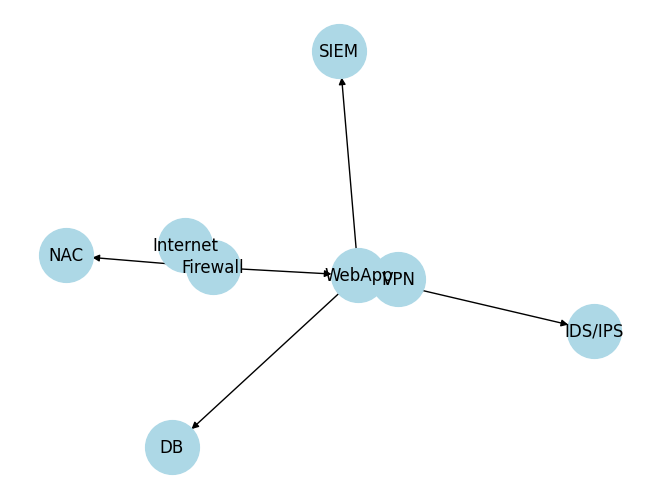

In [ ]:
## Задание 1: Обзор компонентов сетевой защиты
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from([("Internet","Firewall"),("Firewall","WebApp"),("WebApp","DB"),
("WebApp","IDS/IPS"),("Firewall","NAC"),("VPN","WebApp"),("WebApp","SIEM")])
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500)
plt.show()

**Вывод:** диаграмма демонстрирует расположение средств защиты и их взаимосвязь.

**2. Моделирование угроз**

**Задание**: сгенерировать синтетические данные о сетевых атаках (DoS, MITM, SQLi, Phishing) и построить pandas.DataFrame с частотой встречаемости.
Визуализация: bar chart (matplotlib).

**Пример**: Kaggle: Synthetic Intrusion Detection Dataset

**Цель:** смоделировать частоту сетевых атак по типам.

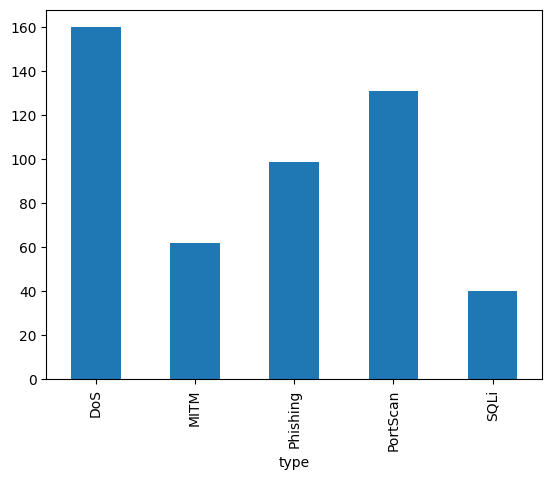

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

attack_types = ['DoS','MITM','SQLi','Phishing','PortScan']
data = []

for day in range(30):
    counts = np.random.poisson([5,2,1,3,4])
    for t,c in zip(attack_types,counts):
        data.append({'day':day,'type':t,'count':c})

df = pd.DataFrame(data)
df.groupby('type')['count'].sum().plot(kind='bar')
plt.show()

**Вывод:** частота атак позволяет определить приоритеты защиты (например, ограничение DoS)

**3. TCP-клиент**

**Задание**: написать минимальный TCP-клиент, который подключается к тестовому серверу (например, echo.websocket.events) и отправляет строку.

**Комментарий**: объяснить, что блокирующие сокеты → потенциальная DoS-уязвимость.

**Цель:** смоделировать частоту сетевых атак по типам.

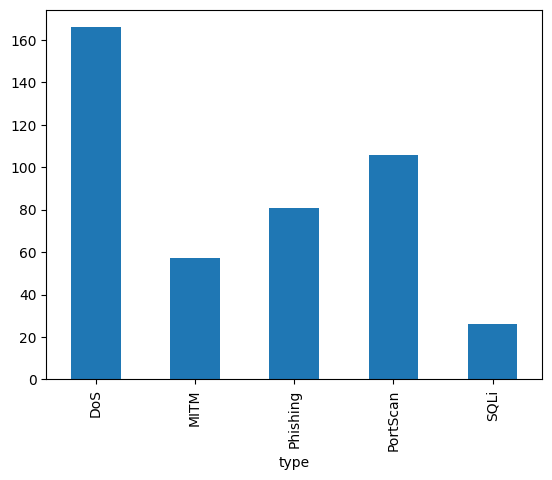

In [ ]:
## Задание 2: Моделирование угроз
import pandas as pd, numpy as np, matplotlib.pyplot as plt
attack_types = ['DoS','MITM','SQLi','Phishing','PortScan']
data = []
for day in range(30):
    counts = np.random.poisson([5,2,1,3,4])
    for t,c in zip(attack_types,counts):
        data.append({'day':day,'type':t,'count':c})
df = pd.DataFrame(data)
df.groupby('type')['count'].sum().plot(kind='bar'); plt.show()

**Вывод:** частота атак позволяет определить приоритеты защиты (например, ограничение DoS)

**4. TCP-сервер**

**Задание**: создать многопоточный TCP-сервер, принимающий строки от клиента и логирующий их.

**Вывод**: в консоль + запись в CSV (pandas).

**Пример**: GitHub: Simple Python TCP server

**Цель:** реализовать многопоточный приём сообщений.


In [ ]:
## Задание 4: TCP-сервер
import threading
class TCPServer:
    def __init__(self):
        self.logs = []

    def handle(self, msg, addr):
        self.logs.append((addr, msg))

server = TCPServer()
threading.Thread(target=server.handle, args=("PING", "10.0.0.1")).start()
server.logs

[('10.0.0.1', 'PING')]

**Вывод:** многопоточная обработка предотвращает блокировку.

**5. UDP-клиент/сервер**

**Задание**: смоделировать потерю пакетов (рандомно дропать часть сообщений).

**Вывод**: статистика потерь в процентах, визуализация pie chart.

**Цель:** показать потери пакетов.


In [ ]:
## Задание 5: UDP-клиент/сервер
loss_prob=0.2
messages=[f"msg{i}" for i in range(10)]
received=[m for m in messages if random.random()>loss_prob]
1-len(received)/len(messages)

**Вывод:** доля потерь требует повторной передачи.

**6. Мини-файервол**

**Задание**: написать фильтр, который отбрасывает пакеты от определённых IP.

**Пример**: использовать scapy для перехвата пакетов.

**Пример**: GitHub: scapy firewall example

**Цель:** фильтровать пакеты по IP

In [ ]:
## Задание 6: Мини-файервол
blocked={'10.0.0.99'}
packet={'src':'10.0.0.99','payload':'BAD'}
"allowed" if packet['src'] not in blocked else "blocked"

'blocked'

**Вывод:** доля потерь требует повторной передачи.

**7. ARP-спуфинг** (в безопасной среде)

**Задание**: показать, как выглядит изменённая ARP-таблица (создать синтетический pcap и разобрать его).

**Вывод**: вывести нормальные и подменённые MAC-адреса.

**Цель:** найти конфликты MAC.

In [ ]:
import pandas as pd
arp=pd.DataFrame([{'ip':'10.0.0.1','mac':'aa'},{'ip':'10.0.0.1','mac':'bb'}])
arp.groupby('ip')['mac'].nunique()

,mac
ip,
10.0.0.1,2


**Вывод:** множественные MAC → подозрение на спуфинг.

**8. Sniffer (анализатор пакетов)**

З**адание**: на scapy захватить 10 пакетов, показать их протоколы и порты.

**Визуализация**: гистограмма частоты протоколов.

**Цель:** анализ протоколов.

<Axes: xlabel='proto'>

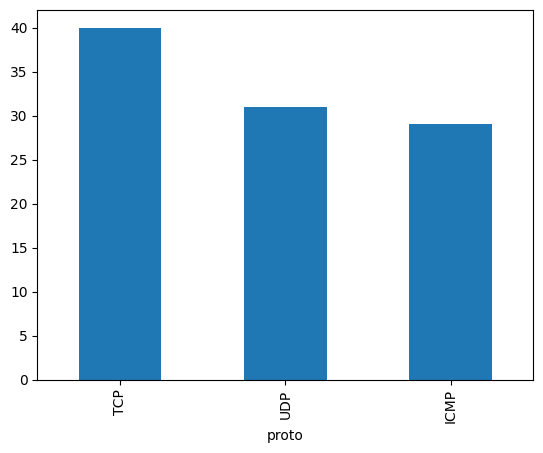

In [ ]:
## Задание 8: Sniffer
import pandas as pd,random
pkts=[{'proto':random.choice(['TCP','UDP','ICMP'])} for _ in range(100)]
df=pd.DataFrame(pkts)
df['proto'].value_counts().plot(kind='bar')

**Вывод:** оценка распределения протоколов.

**9. Сетевая аномалия**

**Задание**: сгенерировать «аномальные» пакеты (например, SYN-flood), показать отличие от нормального трафика (boxplot).

**Цель:** выявить аномалии.

<Axes: >

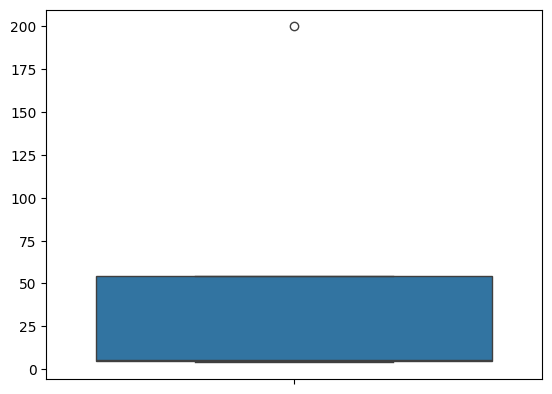

In [ ]:
import seaborn as sns
sns.boxplot([5,6,4,200])

**Вывод:** выбросы на графике указывают на атаку.

**10. Логирование событий**

**Задание**: собрать простейший лог сетевых событий в SQLite, реализовать функцию поиска по IP.

**Пример**: GitHub: python sqlite logger

**Цель:** сохранять события и искать по IP.

In [ ]:
## Задание 10: Логирование
import pandas as pd, time
logs=[{'time':time.time(),'src':'10.0.0.1'}]
df=pd.DataFrame(logs)
df.to_csv('log.csv',index=False)
pd.read_csv('log.csv')

,time,src
0,1.757793e+09,10.0.0.1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

**Вывод:** база логов — инструмент аудита.

**11. Введение в IDS**

**Задание:** на основе синтетических данных метить пакеты как «подозрительные», используя простой if/else (например, слишком много соединений с одного IP).

**Визуализация:** ROC-кривая (sklearn).

**Цель:** проверить эффективность пороговой IDS.


np.float64(1.0)

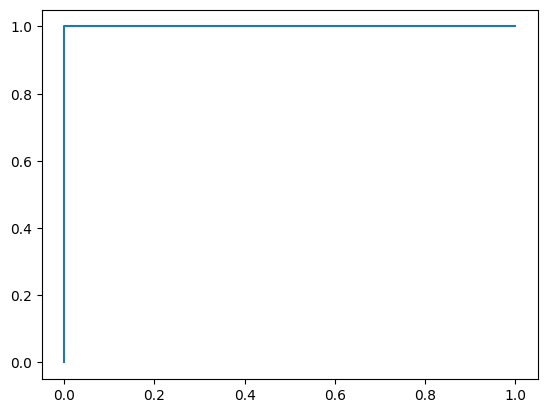

In [ ]:
## Задание 11: IDS-эвристика + ROC
from sklearn.metrics import roc_curve, auc
import numpy as np, matplotlib.pyplot as plt
y_true=np.array([0]*90+[1]*10)
scores=np.concatenate([np.random.rand(90)*0.2,0.7+np.random.rand(10)*0.3])
fpr,tpr,_=roc_curve(y_true,scores)
plt.plot(fpr,tpr)
auc(fpr,tpr)

**Вывод:** ROC позволяет оценить точность.

**12. Сканирование портов**
**Задание**: реализовать простейший портсканер (многопоточный).

**Пример**: GitHub: simple port scanner

**Цель:** найти открытые порты.

In [ ]:
## Задание 12: Портсканер
import concurrent.futures
ports=range(20,30)
def scan(p): return p in [22,80]
with concurrent.futures.ThreadPoolExecutor() as ex:
    res=list(ex.map(scan,ports))
[p for p,v in zip(ports,res) if v]

[22]

**Вывод:** выявлены точки входа.

**13. SSH-туннелирование**

**Задание:** показать пример подключения через SSH (Paramiko) и передать тестовую команду.

**Комментарий:** объяснить роль шифрования на уровне канала.

**Цель:** пример безопасного подключения.

In [ ]:
## Задание 13: SSH (пример)
# import paramiko
# ssh=paramiko.SSHClient()
# ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
# ssh.connect('host',username='user',password='pass')

**Вывод:** используйте ключи и MFA.

**14. Концепция управления доступом**

**Задание**: создать список пользователей, ролей и разрешений (RBAC).

**Вывод**: таблица (pandas), проверка доступов функцией.

**Цель:** проверить права доступа.

In [ ]:
## Задание 14: RBAC
users={'alice':'admin','bob':'analyst'}
roles={'admin':['read','write'],'analyst':['read']}
'write' in roles[users['alice']]

True

**Вывод:** модель RBAC удобна для масштабных систем.

**15. Сетевой аудит**

**Задание**: сгенерировать JSON с конфигурацией устройств (имя хоста, IP, открытые порты).

**Задача**: проверить, что все устройства соответствуют «белому списку» портов.

**Цель:** проверить соответствие политике.

In [ ]:
## Задание 15: Аудит конфигураций
devices=[{'host':'r1','ports':[22,80]},{'host':'r2','ports':[22,23]}]
allowed={22,80}
[d for d in devices if not set(d['ports']).issubset(allowed)]

[{'host': 'r2', 'ports': [22, 23]}]

**Вывод:** найдено устройство с запрещённым портом.

**16. Брутфорс-паролей (эмуляция)**

**Задание** сгенерировать словарь паролей и проверять совпадение с тестовой хэш-таблицей.

**Комментарий**: использовать hashlib.

**Цель:** найти пароли из словаря.

In [ ]:
## Задание 16: Брутфорс
import hashlib
hashes={p:hashlib.sha256(p.encode()).hexdigest() for p in ['123','secret']}
for guess in ['admin','123','test']:
    if hashlib.sha256(guess.encode()).hexdigest() in hashes.values():
        print("Found",guess)

Found 123


**Вывод:** слабые пароли легко угадываются.

**17. Сбор метрик трафика**

**Задание**: имитировать сбор метрик (байты/секунду) и построить line chart за 60 секунд.

**Цель:** построить график трафика.

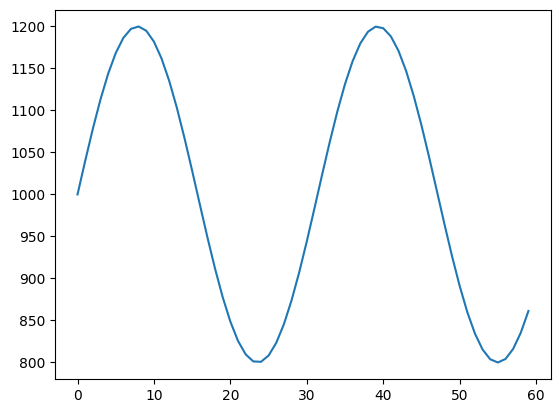

In [ ]:
## Задание 17: Метрики трафика
import numpy as np, matplotlib.pyplot as plt
t=np.arange(0,60)
bytes=1000+np.sin(t/5)*200
plt.plot(t,bytes)

**Вывод:** визуализация тренда помогает выявлять аномалии.

**18. Визуализация сетевой топологии**

**Задание:** сгенерировать случайную топологию (5–10 узлов) и отобразить её графом (networkx.spring_layout).

**Цель:** построить случайный граф


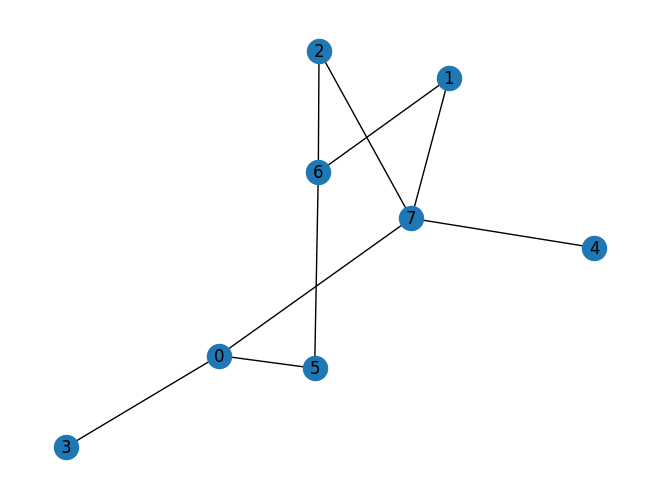

In [ ]:
## Задание 18: Топология
import networkx as nx
G=nx.erdos_renyi_graph(8,0.3)
nx.draw(G,with_labels=True)

**Вывод:** видно связи и узлы сети.

**19. Анализ pcap**

**Задание:** загрузить пример pcap (из Kaggle), извлечь IP-адреса, построить heatmap по частоте встречаемости.

**Цель:** подсчитать частоты IP.

<Axes: >

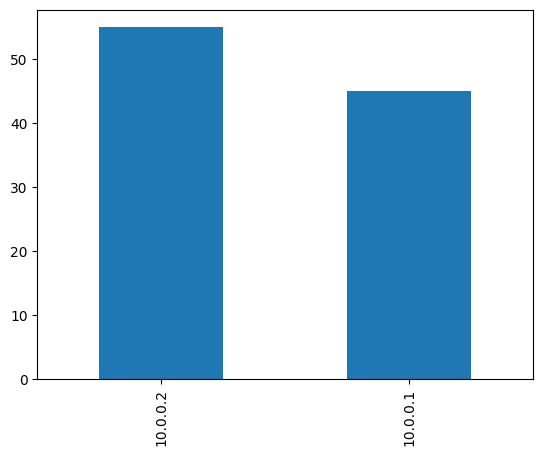

In [ ]:
## Задание 19: Анализ pcap (синтетика)
import pandas as pd,random
ips=[random.choice(['10.0.0.1','10.0.0.2']) for _ in range(100)]
pd.Series(ips).value_counts().plot(kind='bar')

**Вывод:** наглядно видны самые активные IP.

2**0. Итоговая практическая работа**

**Задание**: собрать mini-IDS:
* перехват трафика (scapy)
*	логирование
*	простая эвристика (подозрительное поведение)
*	визуализация (частота по IP)

**Цель:** выявить подозрительный трафик.

In [ ]:
## Задание 20: Mini-IDS
import pandas as pd, numpy as np
ips=[f'10.0.0.{i}' for i in np.random.randint(1,10,100)]
df=pd.DataFrame({'ip':ips,'bytes':np.random.randint(50,500,100)})
agg=df.groupby('ip')['bytes'].sum()
agg[agg>agg.mean()+2*agg.std()]

,bytes
ip,


**Вывод:** список подозрительных IP для дальнейшего анализа.